# World Data League 2021
## Team DSAlpha


## Introduction
Our team is working on the churn and retention model for the public transportation. The models we built will predict the average number of passengers traveling within a particular city and will detect the probability of the variable which contributes more to the prediction. 

Business Model: 
We built a model which quanitfies the important features that contribute more to the Prediction model.

Prediction Model: We have built an ensemble model that will allows individual to predict the number of Avergae Bus users based on the number of different factors.


## Exploratory Data Analysis
We will be analysing the data provided using basic EDA tools like numpy, pandas, seaborn, matplotlib, plotly, etc.

In [1]:
#importing the required libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
userpro=pd.read_csv('New_Churn_Userprofile.csv')
od=pd.read_excel('Churn_OD.xlsx')
od.head()
userpro.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110639,0.069997
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110658,0.066059
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110654,0.059847
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110633,0.052341


,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day,Average Temp
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206,17.0
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817,17.0
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.836653,17.0
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.951323,17.0
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.148092,17.0


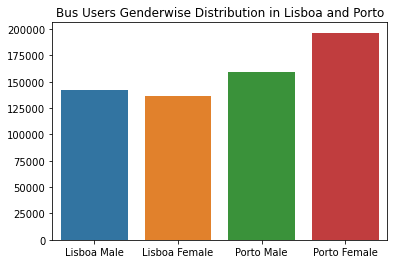

In [4]:
female_lisboa=userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['GenderDescription']=='Female')].sum()['Average_BusUsers_per_Day']
male_lisboa=userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['GenderDescription']=='Male')].sum()['Average_BusUsers_per_Day']
female_porto=userpro[(userpro['Region_of_Origin']=='R2 - AM Porto') & (userpro['GenderDescription']=='Female')].sum()['Average_BusUsers_per_Day']
male_porto=userpro[(userpro['Region_of_Origin']=='R2 - AM Porto') & (userpro['GenderDescription']=='Male')].sum()['Average_BusUsers_per_Day']

sns.barplot(x=['Lisboa Male','Lisboa Female','Porto Male','Porto Female'],y=[male_lisboa,female_lisboa,male_porto,female_porto]);
plt.title('Bus Users Genderwise Distribution in Lisboa and Porto');

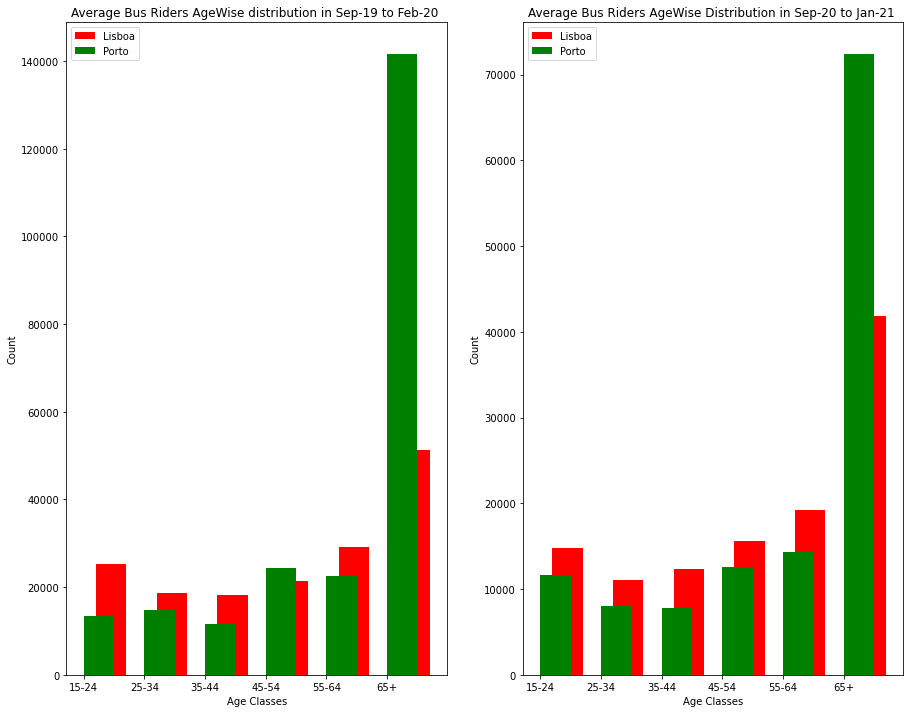

In [7]:
ages=userpro.AgeClassDescription.unique()
ages_lisboa=[]
ages_porto =[]
for i in ages:
    ages_lisboa.append(userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['Period']=='Sep-19 to Feb-20') & (userpro['AgeClassDescription']==i)].sum()['Average_BusUsers_per_Day'])
    ages_porto.append(userpro[(userpro['Region_of_Origin']=='R2 - AM Porto') & (userpro['Period']=='Sep-19 to Feb-20') & (userpro['AgeClassDescription']==i)].sum()['Average_BusUsers_per_Day'])

plt.figure(figsize=(15,12))
X = np.arange(len(ages_lisboa))
plt.subplot(1,2,1)
plt.bar(X+0.7, ages_lisboa, color = 'r', width = 0.5);
plt.bar(X + 0.5, ages_porto, color = 'g', width = 0.5);
# Creating the legend of the bars in the plot
plt.legend(['Lisboa','Porto'])
# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(6)], ages)
# Giving the tilte for the plot
plt.title("Average Bus Riders AgeWise distribution in Sep-19 to Feb-20 ")
# Namimg the x and y axis
plt.xlabel('Age Classes')
plt.ylabel('Count')


ages=userpro.AgeClassDescription.unique()
ages_lisboa=[]
ages_porto =[]
for i in ages:
    ages_lisboa.append(userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['Period']=='Sep-20 to Jan-21') & (userpro['AgeClassDescription']==i)].sum()['Average_BusUsers_per_Day'])
    ages_porto.append(userpro[(userpro['Region_of_Origin']=='R2 - AM Porto') & (userpro['Period']=='Sep-20 to Jan-21') & (userpro['AgeClassDescription']==i)].sum()['Average_BusUsers_per_Day'])

X = np.arange(len(ages_lisboa))
plt.subplot(1,2,2)
plt.bar(X+0.7, ages_lisboa, color = 'r', width = 0.5);
plt.bar(X + 0.5, ages_porto, color = 'g', width = 0.5);
# Creating the legend of the bars in the plot
plt.legend(['Lisboa','Porto']);
# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(6)], ages);
# Giving the tilte for the plot
plt.title("Average Bus Riders AgeWise Distribution in Sep-20 to Jan-21 ");
# Namimg the x and y axis
plt.xlabel('Age Classes');
plt.ylabel('Count');

#also acc to stats, porto and lisboa have 28% age of 65+ but acc to graph, it shows lisboa senior citizens dont tarvel much

In [8]:
set(userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa')]['County_of_Origin'])
#each region contain 2 districts and (18 ,17)  counties

{'Alcochete',
 'Almada',
 'Amadora',
 'Barreiro',
 'Cascais',
 'Lisboa',
 'Loures',
 'Mafra',
 'Moita',
 'Montijo',
 'Odivelas',
 'Oeiras',
 'Palmela',
 'Seixal',
 'Sesimbra',
 'Setúbal',
 'Sintra',
 'Vila Franca de Xira'}

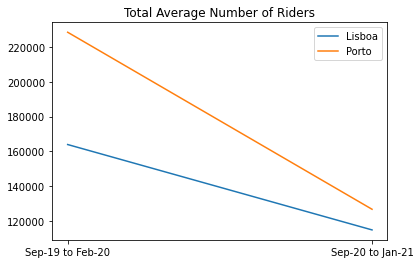

In [9]:
pr1_lisboa=userpro[(userpro['Period']=='Sep-19 to Feb-20') & (userpro['Region_of_Origin']=='R1 - AM Lisboa')].sum()['Average_BusUsers_per_Day']
pr2_lisboa=userpro[(userpro['Period']=='Sep-20 to Jan-21') & (userpro['Region_of_Origin']=='R1 - AM Lisboa')].sum()['Average_BusUsers_per_Day']
pr1_porto=userpro[(userpro['Period']=='Sep-19 to Feb-20') & (userpro['Region_of_Origin']=='R2 - AM Porto')].sum()['Average_BusUsers_per_Day']
pr2_porto=userpro[(userpro['Period']=='Sep-20 to Jan-21') & (userpro['Region_of_Origin']=='R2 - AM Porto')].sum()['Average_BusUsers_per_Day']

sns.lineplot(y=[pr1_lisboa,pr2_lisboa],x=['Sep-19 to Feb-20','Sep-20 to Jan-21']);
sns.lineplot(y=[pr1_porto,pr2_porto],x=['Sep-19 to Feb-20','Sep-20 to Jan-21']);
plt.title('Total Average Number of Riders');
plt.legend(['Lisboa',"Porto"]);

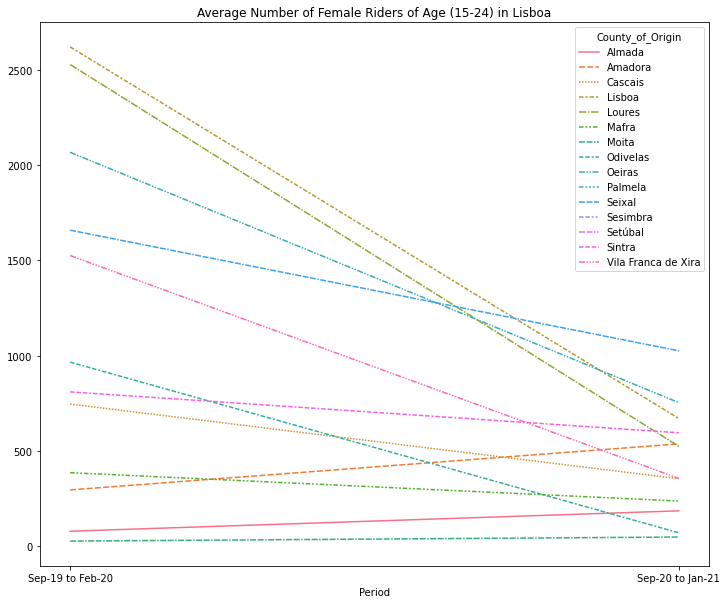

In [10]:
female_lisboa_15=userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['AgeClassDescription']=='15-24')& (userpro['GenderDescription']=='Female')]
female_lisboa_15_temp=female_lisboa_15.pivot('Period','County_of_Origin','Average_BusUsers_per_Day')
plt.figure(figsize=(12,10));
sns.lineplot(data=female_lisboa_15_temp);
plt.title('Average Number of Female Riders of Age (15-24) in Lisboa');

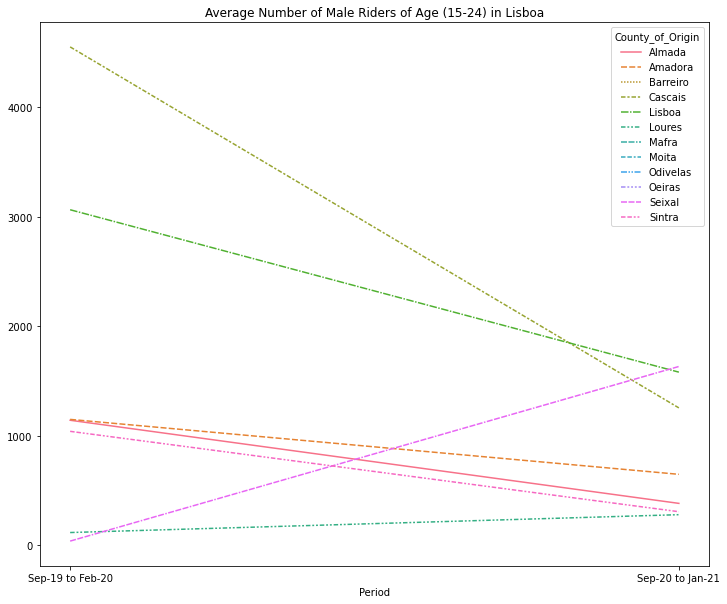

In [11]:
male_lisboa_15=userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['AgeClassDescription']=='15-24')& (userpro['GenderDescription']=='Male')]
male_lisboa_15_temp=male_lisboa_15.pivot('Period','County_of_Origin','Average_BusUsers_per_Day')
plt.figure(figsize=(12,10));
sns.lineplot(data=male_lisboa_15_temp);
plt.title('Average Number of Male Riders of Age (15-24) in Lisboa');

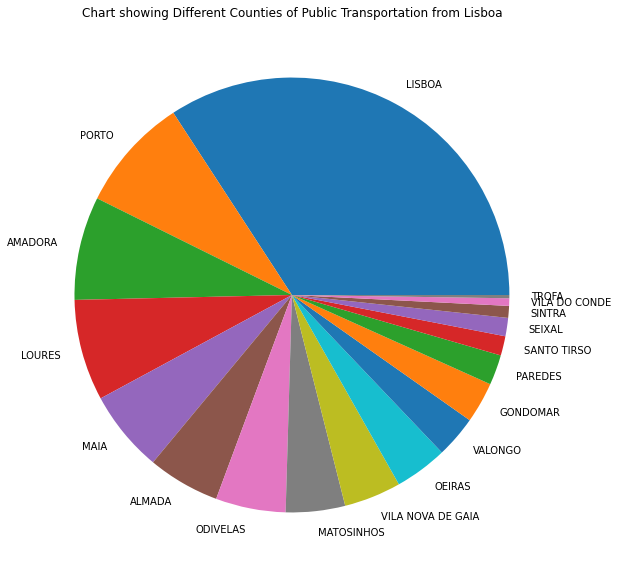

In [12]:
ttemp=od[(od['Region_of_Origin']=='R1 - AM Lisboa')]['County_of_Public_Transportation'].value_counts()

plt.figure(figsize=(12,10))
plt.pie(ttemp.values,labels=ttemp.index,);
plt.title('Chart showing Different Counties of Public Transportation from Lisboa');

## Data Engineering

In [13]:
#addding a new average temp field(average temp during that particular timep peroid)
temp=userpro[(userpro['Period']=='Sep-19 to Feb-20')]
temp['Average Temp']=temp['Region_of_Origin'].map({'R1 - AM Lisboa':17.0,'R2 - AM Porto':16.0})

temp1=userpro[(userpro['Period']=='Sep-20 to Jan-21')]
temp1['Average Temp']=temp1['Region_of_Origin'].map({'R1 - AM Lisboa':15.2,'R2 - AM Porto':13.6})

df=[temp,temp1]
new_userpro=pd.concat(df)

<ipython-input-13-cfddc4f0f276>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Average Temp']=temp['Region_of_Origin'].map({'R1 - AM Lisboa':17.0,'R2 - AM Porto':16.0})
<ipython-input-13-cfddc4f0f276>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Average Temp']=temp1['Region_of_Origin'].map({'R1 - AM Lisboa':15.2,'R2 - AM Porto':13.6})


In [14]:
#creating a column county_mean(mean encoding)
di=[]
for i in od.County_of_Origin.unique():
    di.append([len(od[(od['County_of_Origin']==i)])/99,i])
d = {}
for val in di:
    d[val[1]]=val[0]
od['New_county_mean']=od['County_of_Origin'].map(d)

In [15]:
#merging everything into the one dataset
merge=pd.merge(left=od,right=userpro.drop(['Region_of_Origin','District_of_Origin'],axis=1),on=['County_of_Origin'])
merge.to_csv('Final_Merge.csv',index=False)

In [16]:
merge.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight,New_county_mean,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day,Average Temp
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,15-24,294.194206,17.0
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,25-34,1081.652817,17.0
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,35-44,235.836653,17.0
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,45-54,840.951323,17.0
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,55-64,1216.148092,17.0


## Ensemble Modelling

In [17]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [18]:
#copying the merge dataset to train 
train=merge.copy()

In [19]:
labs=['Region_of_Origin', 'District_of_Origin', 'County_of_Origin',
       'Region_of_Public_Transportation', 'District_of_Public_Transportation',
       'County_of_Public_Transportation',
       'Period', 'GenderDescription', 'AgeClassDescription','Dicofre_ParishCode_of_Public_Transportation']

#coverting all the columns categorical datat to ordinal encoding
for i in labs:
    ord_enc = OrdinalEncoder()
    train[i] = ord_enc.fit_transform(train[[i]])

In [20]:
train.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight,New_county_mean,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day,Average Temp
0,0.0,1.0,2.0,0.0,0.0,3.0,3.0,0.307323,0.777778,0.0,0.0,0.0,294.194206,17.0
1,0.0,1.0,2.0,0.0,0.0,3.0,3.0,0.307323,0.777778,0.0,0.0,1.0,1081.652817,17.0
2,0.0,1.0,2.0,0.0,0.0,3.0,3.0,0.307323,0.777778,0.0,0.0,2.0,235.836653,17.0
3,0.0,1.0,2.0,0.0,0.0,3.0,3.0,0.307323,0.777778,0.0,0.0,3.0,840.951323,17.0
4,0.0,1.0,2.0,0.0,0.0,3.0,3.0,0.307323,0.777778,0.0,0.0,4.0,1216.148092,17.0


In [21]:
X=train.drop('Average_BusUsers_per_Day',axis=1)
y=train['Average_BusUsers_per_Day']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.50, random_state=354)

In [23]:
#helps us to check the correlation between of differnt variables wioth Average Bus Users.
X.corrwith(y).sort_values()

Period                                        -0.095254
County_of_Origin                              -0.072147
GenderDescription                             -0.015933
Demand_weight                                 -0.012056
District_of_Origin                             0.014348
Average Temp                                   0.019094
District_of_Public_Transportation              0.028892
County_of_Public_Transportation                0.029355
Dicofre_ParishCode_of_Public_Transportation    0.030977
Region_of_Public_Transportation                0.038908
Region_of_Origin                               0.130687
New_county_mean                                0.168141
AgeClassDescription                            0.246075
dtype: float64

### Linear Regression Model

In [24]:
#Linear Regression Model
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
print(mean_absolute_error(y_test,pred_lr))
# filename = 'lr.sav'
# pickle.dump(lr, open(filename, 'wb'))

LinearRegression()

1487.2428848192587


### KNNeighbors Regressor

In [30]:
#KNN model
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(mean_absolute_error(y_test,pred_knn))
# filename = 'knn.sav'
# pickle.dump(knn, open(filename, 'wb'))

KNeighborsRegressor(n_neighbors=10)

992.9291559119489


### Random Forest Regressor

In [25]:
#Random forest Model
rfr =RandomForestRegressor()
rfr.fit(X_train,y_train)
pred_rfr=rfr.predict(X_test)
print(mean_absolute_error(y_test,pred_rfr))
# filename = 'rfr.sav'
# pickle.dump(rfr, open(filename, 'wb'))

RandomForestRegressor()

8.349208562779355


### AdaBoost Regressor

In [26]:
#AdaBoost Regressor Model
abr=AdaBoostRegressor()
abr.fit(X_train,y_train)
pred_abr=abr.predict(X_test)
print(mean_absolute_error(y_test,pred_abr))
# filename = 'abr.sav'
# pickle.dump(abr, open(filename, 'wb')

AdaBoostRegressor()

1181.5659977182681


### Decision Tree Regressor

In [27]:
#Decision tree regressor model
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred_dt=dt.predict(X_test)
print(mean_absolute_error(y_test,pred_dt))
# filename = 'dt.sav'
# pickle.dump(dt, open(filename, 'wb'))

DecisionTreeRegressor()

3.4597522107768333


### Neural Network Model

In [28]:
#neural network model
model = Sequential()
model.add(Dense(13, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(26, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=256,verbose=1)

# model_json = model.to_json() 
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# model.save_weights("model.h5")
  
# # # Loading JSON file 
# # json_file = open("model.json", 'r')
# # loaded_model_json = json_file.read()
# # json_file.close()
# # loaded_model = model_from_json(loaded_model_json)
  
# # # Loading weights
# # loaded_model.load_weights("network.h5")

Epoch 1/200
79/79 [==============================] - 2s 13ms/step - loss: 21825281.6625 - mae: 1328.1807 - val_loss: 19134478.0000 - val_mae: 1230.8562
Epoch 2/200
79/79 [==============================] - 0s 2ms/step - loss: 17020590.0750 - mae: 1123.1533 - val_loss: 17925770.0000 - val_mae: 1220.3606
Epoch 3/200
79/79 [==============================] - 0s 2ms/step - loss: 18384699.4812 - mae: 1270.8856 - val_loss: 17809348.0000 - val_mae: 1272.6860
Epoch 4/200
79/79 [==============================] - 0s 2ms/step - loss: 16759437.0625 - mae: 1266.0189 - val_loss: 17738144.0000 - val_mae: 1291.5295
Epoch 5/200
79/79 [==============================] - 0s 2ms/step - loss: 15416626.2000 - mae: 1228.7422 - val_loss: 17662126.0000 - val_mae: 1314.7335
Epoch 6/200
79/79 [==============================] - 0s 2ms/step - loss: 18903003.0500 - mae: 1344.9568 - val_loss: 17602394.0000 - val_mae: 1284.1519
Epoch 7/200
79/79 [==============================] - 0s 2ms/step - loss: 15128565.2406 - mae:

79/79 [==============================] - 0s 2ms/step - loss: 9410615.0500 - mae: 1044.1014 - val_loss: 9293365.0000 - val_mae: 1014.6476
Epoch 56/200
79/79 [==============================] - 0s 2ms/step - loss: 9839003.9062 - mae: 1045.8799 - val_loss: 9157514.0000 - val_mae: 1014.8805
Epoch 57/200
79/79 [==============================] - 0s 2ms/step - loss: 9427476.6438 - mae: 1039.9946 - val_loss: 9251207.0000 - val_mae: 991.5818
Epoch 58/200
79/79 [==============================] - 0s 2ms/step - loss: 9037216.3000 - mae: 1012.9905 - val_loss: 9207442.0000 - val_mae: 986.7108
Epoch 59/200
79/79 [==============================] - 0s 2ms/step - loss: 8400923.3625 - mae: 991.1655 - val_loss: 8831634.0000 - val_mae: 1026.9076
Epoch 60/200
79/79 [==============================] - 0s 2ms/step - loss: 7723818.0250 - mae: 984.7841 - val_loss: 8760579.0000 - val_mae: 1001.8471
Epoch 61/200
79/79 [==============================] - 0s 2ms/step - loss: 8396700.1375 - mae: 998.3910 - val_loss: 87

79/79 [==============================] - 0s 2ms/step - loss: 5717661.6312 - mae: 903.3651 - val_loss: 5171471.5000 - val_mae: 876.2606
Epoch 111/200
79/79 [==============================] - 0s 2ms/step - loss: 5223713.1813 - mae: 888.5277 - val_loss: 5192375.0000 - val_mae: 871.6711
Epoch 112/200
79/79 [==============================] - 0s 2ms/step - loss: 5907190.7062 - mae: 917.5372 - val_loss: 5040336.0000 - val_mae: 902.6540
Epoch 113/200
79/79 [==============================] - 0s 2ms/step - loss: 5871004.7125 - mae: 924.3812 - val_loss: 4892314.0000 - val_mae: 867.9103
Epoch 114/200
79/79 [==============================] - 0s 2ms/step - loss: 5208162.2125 - mae: 884.6405 - val_loss: 4964676.0000 - val_mae: 859.2853
Epoch 115/200
79/79 [==============================] - 0s 2ms/step - loss: 5135401.8719 - mae: 869.4616 - val_loss: 4908759.0000 - val_mae: 861.5188
Epoch 116/200
79/79 [==============================] - 0s 2ms/step - loss: 4553591.6078 - mae: 867.3504 - val_loss: 4665

79/79 [==============================] - 0s 2ms/step - loss: 4142559.0406 - mae: 833.4066 - val_loss: 3217905.7500 - val_mae: 784.3312
Epoch 166/200
79/79 [==============================] - 0s 2ms/step - loss: 3509454.4859 - mae: 821.7186 - val_loss: 3213354.0000 - val_mae: 768.6545
Epoch 167/200
79/79 [==============================] - 0s 3ms/step - loss: 3703038.1844 - mae: 816.7263 - val_loss: 3165034.5000 - val_mae: 772.7535
Epoch 168/200
79/79 [==============================] - 0s 2ms/step - loss: 3887932.0250 - mae: 813.2329 - val_loss: 3193691.2500 - val_mae: 782.5475
Epoch 169/200
79/79 [==============================] - 0s 2ms/step - loss: 4045459.7531 - mae: 813.9210 - val_loss: 3260776.0000 - val_mae: 779.6612
Epoch 170/200
79/79 [==============================] - 0s 3ms/step - loss: 3760758.2719 - mae: 815.0880 - val_loss: 3315119.5000 - val_mae: 798.1744
Epoch 171/200
79/79 [==============================] - 0s 2ms/step - loss: 3630557.8062 - mae: 814.1512 - val_loss: 4322

In [31]:
#creating a dataset with all the predictions containing the ground truth as well
test=pd.DataFrame(data=y_test)
test['pred_lr']=pred_lr
test['pred_knn']=pred_knn
test['pred_rfr']=pred_rfr
test['pred_abr']=pred_abr
test['pred_dt']=pred_dt
test['pred_nn']=model.predict(X_test)

In [32]:
test.head()

,Average_BusUsers_per_Day,pred_lr,pred_knn,pred_rfr,pred_abr,pred_dt,pred_nn
26266,105.282267,-730.536562,379.544105,105.282267,1481.541015,105.282267,638.317444
10691,662.735255,-175.024414,786.631028,662.735255,1004.639924,662.735255,608.875305
33788,857.322229,1499.844377,879.304979,857.322229,1434.949973,857.322229,796.667358
22773,98.771815,509.349775,605.749286,98.771815,887.739160,98.771815,885.977051
1839,54.954584,2901.687481,472.072619,394.795234,4004.644852,54.954584,2173.959717


In [33]:
#final Decison Tree regressor Model
final_dt=DecisionTreeRegressor()
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_test, y_test, test_size=0.25, random_state=354)
final_dt.fit(X_train_1,y_train_1)
final_pred=final_dt.predict(X_test_1)
mean_absolute_error(y_test_1,final_pred)

#adding final column to dataframe
test['Final_lr']=final_dt.predict(X_test)

DecisionTreeRegressor()

6.2664320041563695

## Conclusions

### Scalability and Impact
Tell us how applicable and scalable your solution is if you were to implement it in a city. Identify possible limitations and measure the potential social impact of your solution.

Scalability:


Limitations:


Social Impact of the solution:



### Future Work

If we had access to the data mentioned below, we would have been able to solve this challenge even better.

1.Date Period : In our opinion, if the date period was given for each month,a time series analysis model could be used to forecast the number of passengers for a particular region.


2.Ticket Data for the particular region: Each ticket price a person pays is according to the number of stops they will be on the bus. By looking at the stops in the ticket we can deduct whether if a person would get off a bus early and can deduct if the bus can accomodate more passengers.

3.Air pollution: The openweather API only provides air pollution data from Novemeber 11 2020, if we had the data for the period given in the dataset we could use air pollution data to prove the models scalability.